<a href="https://colab.research.google.com/github/Schollera/MAT421/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sohan Chollera

HW#10 | MAT421

Module H

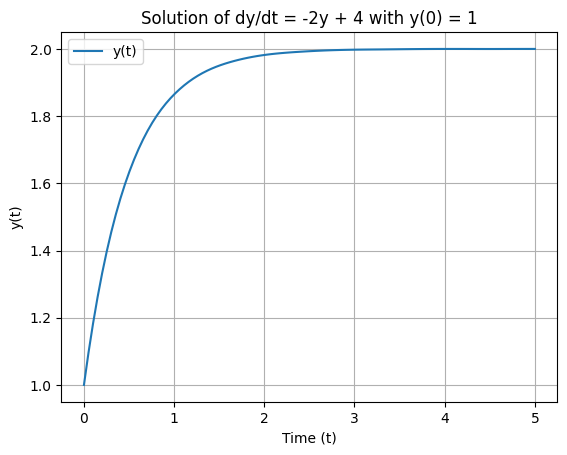

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define ODE
def ode(t, y):
    return -2 * y + 4

#Initial
y0 = [1]
t_span = (0, 5)

#Solve
sol = solve_ivp(ode, t_span, y0, dense_output=True)

# Plot
t_vals=np.linspace(0, 5, 100)
y_vals=sol.sol(t_vals)

plt.plot(t_vals, y_vals[0], label="y(t)")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2y + 4 with y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()

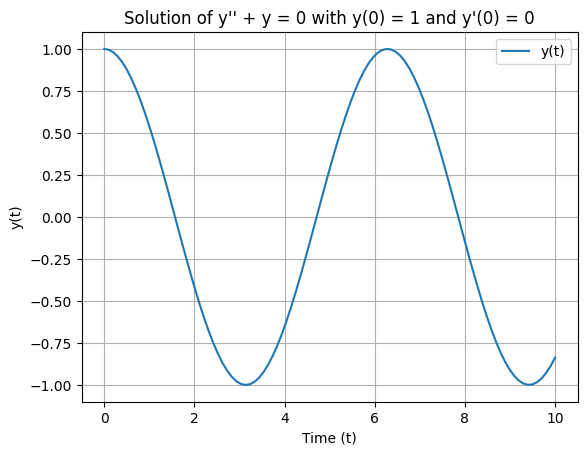

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Define the system of equations
def system(t, z):
    y, v = z  # y is the solution, v is the derivative (y')
    dydt = v
    dvdt = -y
    return [dydt, dvdt]

#Initial
y0=[1, 0]  #y(0)=1, y'(0)=0
t_span = (0, 10)

#Solve system of ODEs
sol = solve_ivp(system, t_span, y0, dense_output=True)

#Plot
t_vals = np.linspace(0, 10, 100)
y_vals = sol.sol(t_vals)[0]

plt.plot(t_vals, y_vals, label="y(t)")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution of y\'\' + y = 0 with y(0) = 1 and y\'(0) = 0')
plt.legend()
plt.grid(True)
plt.show()

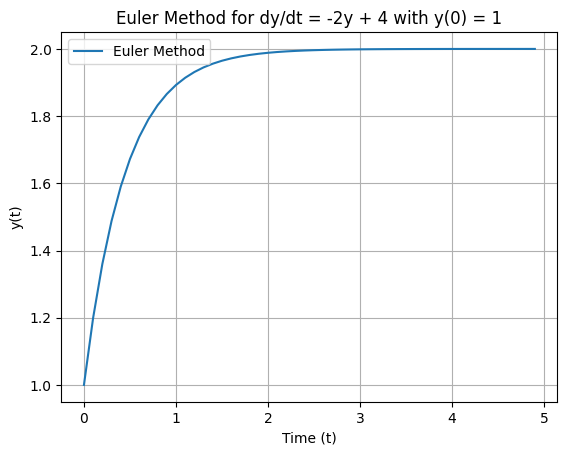

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Define
def ode(t, y):
    return -2 * y + 4

#Euler method
def euler_method(ode, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = y0

    for i in range(1, len(t_vals)):
        y_vals[i] = y_vals[i - 1] + h * ode(t_vals[i - 1], y_vals[i - 1])

    return t_vals, y_vals

#Initial
y0=1
t_span=(0, 5)
h=0.1

#Solve using Euler's
t_vals, y_vals = euler_method(ode, y0, t_span, h)

#Plot
plt.plot(t_vals, y_vals, label="Euler Method")
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Euler Method for dy/dt = -2y + 4 with y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()

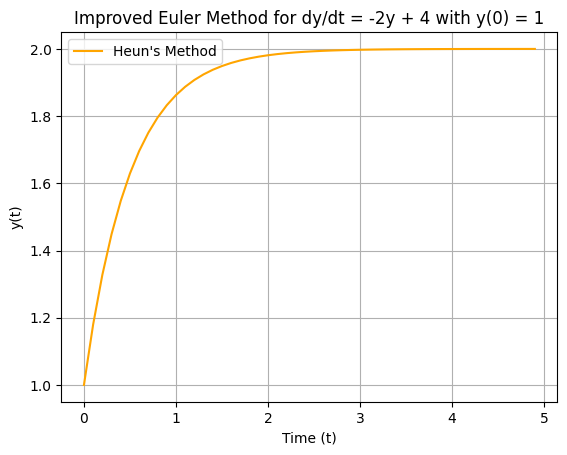

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Define
def ode(t, y):
    return -2 * y + 4

#Euler (Heun’s) method
def heuns_method(ode, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = y0

    for i in range(1, len(t_vals)):
        y_pred = y_vals[i - 1] + h * ode(t_vals[i - 1], y_vals[i - 1])
        y_vals[i] = y_vals[i - 1] + (h / 2) * (ode(t_vals[i - 1], y_vals[i - 1]) + ode(t_vals[i], y_pred))

    return t_vals, y_vals

#Initial
y0 = 1
t_span = (0, 5)
h = 0.1

#Heun's method
t_vals, y_vals = heuns_method(ode, y0, t_span, h)

#Plot
plt.plot(t_vals, y_vals, label="Heun's Method", color='orange')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Improved Euler Method for dy/dt = -2y + 4 with y(0) = 1')
plt.legend()
plt.grid(True)
plt.show()

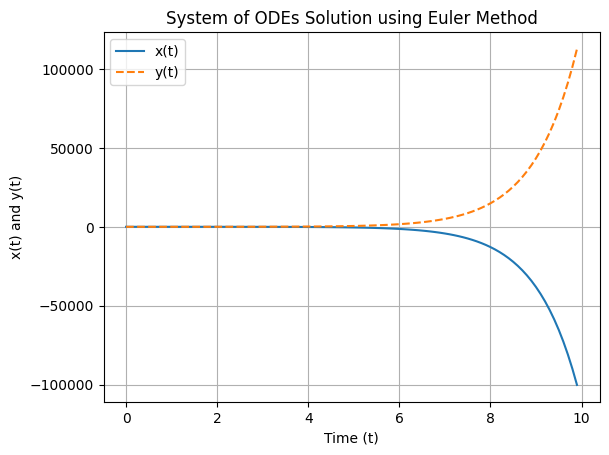

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Define
def system_ode(t, z):
    x, y = z
    dxdt = -y
    dydt = x + 2*y
    return [dxdt, dydt]

#Euler method for systems of ODEs
def euler_method_system(ode, y0, t_span, h):
    t_vals = np.arange(t_span[0], t_span[1], h)
    z_vals = np.zeros((len(t_vals), len(y0)))
    z_vals[0] = y0

    for i in range(1, len(t_vals)):
        z_vals[i] = z_vals[i - 1] + h * np.array(ode(t_vals[i - 1], z_vals[i - 1]))

    return t_vals, z_vals

#Initial
y0 = [1, 0]  #x(0)=1, y(0)=0
t_span = (0, 10)
h = 0.1

#Solve using Euler's method
t_vals, z_vals = euler_method_system(system_ode, y0, t_span, h)

#Plot
plt.plot(t_vals, z_vals[:, 0], label="x(t)")
plt.plot(t_vals, z_vals[:, 1], label="y(t)", linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('x(t) and y(t)')
plt.title('System of ODEs Solution using Euler Method')
plt.legend()
plt.grid(True)
plt.show()